In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
import numpy as np
import math
from scipy import stats
from pprint import pprint
sns.set()

In [2]:
parasweep = pd.read_csv("fox_rabbit3D_multipara.csv")

In [3]:
parasweep.shape

(432000, 8)

In [4]:
para20 = parasweep[parasweep["runtime"]<20]

In [5]:
para20

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
0,0.544513,1157.000000,1152.000000,5.0,0.005,5.000000,1,20
1,0.391062,1139.000000,563.000000,5.0,0.005,6.666667,1,20
2,0.371088,3011.000000,253.000000,5.0,0.005,8.333333,1,20
3,0.198700,580.000000,80.000000,5.0,0.005,10.000000,1,20
4,0.437672,757.000000,717.000000,5.0,0.005,11.666667,1,20
...,...,...,...,...,...,...,...,...
431993,2.475081,523.000000,857.714286,100.0,0.100,76.315789,7,40
431994,2.352409,860.142857,938.000000,100.0,0.100,80.263158,7,40
431995,2.411189,1102.857143,893.142857,100.0,0.100,84.210526,7,40
431996,2.469272,361.428571,1532.571429,100.0,0.100,88.157895,7,40


In [6]:
# adjust runtime with number of trajectories and Timespan
para20["runtime_adj"] = para20["runtime"]/(para20["number_of_trajectories"]*para20["Timespan"])

/tmp/ipykernel_518456/1888535408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  para20["runtime_adj"] = para20["runtime"]/(para20["number_of_trajectories"]*para20["Timespan"])


In [7]:
para20

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan,runtime_adj
0,0.544513,1157.000000,1152.000000,5.0,0.005,5.000000,1,20,0.027226
1,0.391062,1139.000000,563.000000,5.0,0.005,6.666667,1,20,0.019553
2,0.371088,3011.000000,253.000000,5.0,0.005,8.333333,1,20,0.018554
3,0.198700,580.000000,80.000000,5.0,0.005,10.000000,1,20,0.009935
4,0.437672,757.000000,717.000000,5.0,0.005,11.666667,1,20,0.021884
...,...,...,...,...,...,...,...,...,...
431993,2.475081,523.000000,857.714286,100.0,0.100,76.315789,7,40,0.008840
431994,2.352409,860.142857,938.000000,100.0,0.100,80.263158,7,40,0.008401
431995,2.411189,1102.857143,893.142857,100.0,0.100,84.210526,7,40,0.008611
431996,2.469272,361.428571,1532.571429,100.0,0.100,88.157895,7,40,0.008819


In [8]:
X = pd.DataFrame(para20,columns = ["r_birth", "f_birth","f_death"])
Y = para20["runtime_adj"]

In [9]:
from river import stream
from river import evaluate
from river import metrics
from river import neighbors
from river import preprocessing

In [10]:
model = neighbors.KNNRegressor(window_size=50)

In [11]:
model

KNNRegressor (
  n_neighbors=5
  window_size=50
  aggregation_method="mean"
  min_distance_keep=0.
  distance_func=functools.partial(<function minkowski_distance at 0x7fa89ca9b700>, p=2)
)

In [12]:
metric1 = metrics.MAE()
metric2 = metrics.RMSE()
pred = []
for x, y in stream.iter_pandas(X, Y):
    # Obtain the prior prediction and update the model in one go
    y_pred = model.predict_one(x)
    model.learn_one(x,y)
    
    # Update the error metric
    metric1.update(y,y_pred)
    metric2.update(y,y_pred)
    
    # Store the prediction
    pred.append(y_pred)

In [13]:
metric1

MAE: 0.000727

In [14]:
metric2

RMSE: 0.005059

In [15]:
pred

[0.0,
 0.02722562551498413,
 0.023389357328414916,
 0.02177770137786865,
 0.018817031383514402,
 0.019430346488952636,
 0.01835398197174072,
 0.01881278038024902,
 0.018701987266540526,
 0.02050986051559448,
 0.019430346488952636,
 0.019185690879821776,
 0.017764644622802733,
 0.018976902961730956,
 0.020285165309906004,
 0.021878964900970455,
 0.020368332862854003,
 0.019615483283996583,
 0.019335412979125978,
 0.019351377487182617,
 0.022390108108520507,
 0.020929229259490967,
 0.019850714206695555,
 0.01958057165145874,
 0.020947968959808348,
 0.018966410160064697,
 0.019235424995422364,
 0.019920525550842283,
 0.022095768451690673,
 0.021747019290924072,
 0.02014859437942505,
 0.018602540493011473,
 0.020341758728027345,
 0.01761155843734741,
 0.018563480377197263,
 0.017035810947418212,
 0.020598108768463134,
 0.021698136329650876,
 0.019105882644653318,
 0.01999065637588501,
 0.021616618633270263,
 0.01837454557418823,
 0.020007648468017575,
 0.018471279144287107,
 0.017907412052

In [16]:
len(pred)

396678

In [17]:
# Another way to evaluate the model
#model1 = neighbors.KNNRegressor(window_size=50)
#evaluate.progressive_val_score(X_y, model1, metrics.MAE(), print_every=20_000)

In [18]:
# Another way to evaluate the model
#model2 = neighbors.KNNRegressor(window_size=50)
#evaluate.progressive_val_score(X_y, model2, metrics.RMSE(),print_every=20_000)

In [19]:
para20["Pred_runtime_adj"] = pred

/tmp/ipykernel_518456/3503730590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  para20["Pred_runtime_adj"] = pred


In [20]:
para20

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan,runtime_adj,Pred_runtime_adj
0,0.544513,1157.000000,1152.000000,5.0,0.005,5.000000,1,20,0.027226,0.000000
1,0.391062,1139.000000,563.000000,5.0,0.005,6.666667,1,20,0.019553,0.027226
2,0.371088,3011.000000,253.000000,5.0,0.005,8.333333,1,20,0.018554,0.023389
3,0.198700,580.000000,80.000000,5.0,0.005,10.000000,1,20,0.009935,0.021778
4,0.437672,757.000000,717.000000,5.0,0.005,11.666667,1,20,0.021884,0.018817
...,...,...,...,...,...,...,...,...,...,...
431993,2.475081,523.000000,857.714286,100.0,0.100,76.315789,7,40,0.008840,0.008600
431994,2.352409,860.142857,938.000000,100.0,0.100,80.263158,7,40,0.008401,0.008573
431995,2.411189,1102.857143,893.142857,100.0,0.100,84.210526,7,40,0.008611,0.008537
431996,2.469272,361.428571,1532.571429,100.0,0.100,88.157895,7,40,0.008819,0.008642


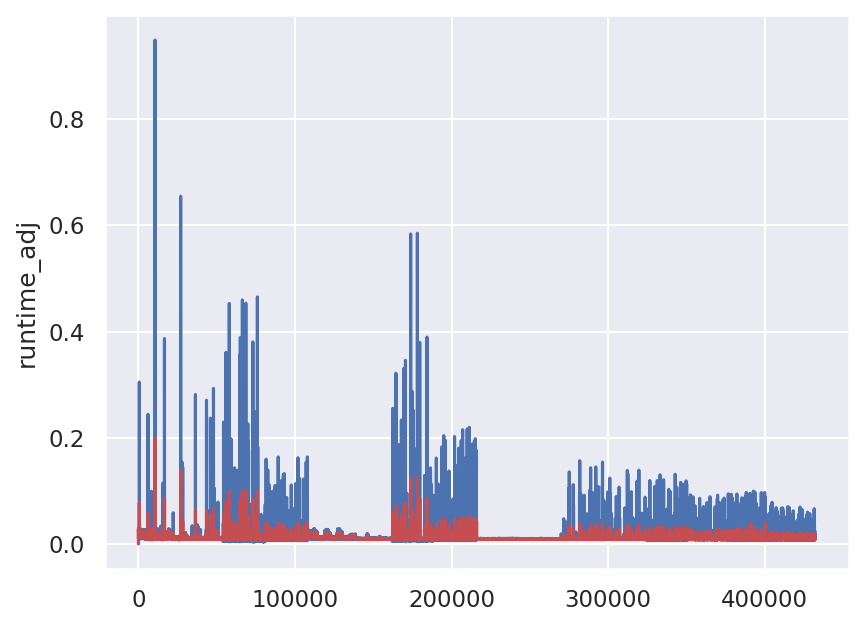

In [21]:
# Plot the results. Blue line represents the adjusted runtime while red line represents the prediction.
sns.lineplot(data = para20["runtime_adj"], color = "b")
sns.lineplot(data = para20["Pred_runtime_adj"], color = "r")
plt.savefig("pre.png")
plt.show()